In [28]:
import numpy as np
import pandas as pd
import seaborn as   sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
data=pd.read_csv('C:/Users/Hai Chau/Downloads/zip/netflix_titles.csv')

In [5]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
data.shape

(8807, 12)

In [10]:
data.size

105684

In [11]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
#check duplicate record

In [21]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [22]:
data.drop_duplicates(inplace=True)


In [23]:
data.shape

(8807, 12)

In [25]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [26]:
# using heat-map to show null values count

<AxesSubplot:>

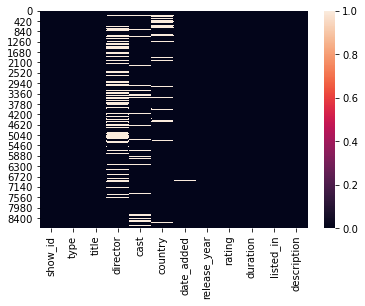

In [30]:
sns.heatmap(data.isnull())

In [31]:
#for'Zombie Dumb' what is the show id and who is the director?


In [36]:
data[data['title'].isin(['Zombie Dumb'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [37]:
data[data['title'].str.contains('Zombie Dumb')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [38]:
#in which year highest number of TV show were added?bar graph

In [39]:
#change to_datetime

In [41]:
data['Date_N']=pd.to_datetime(data['date_added'])

In [44]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [45]:
data['Date_N'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_N, dtype: int64

<AxesSubplot:>

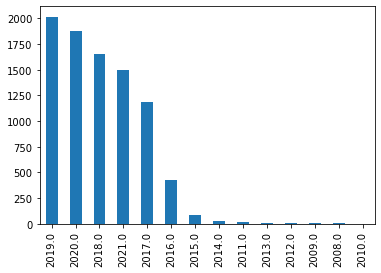

In [48]:
data['Date_N'].dt.year.value_counts().plot(kind='bar')

In [ ]:
# t

In [49]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
data.groupby('type').type.count()

In [53]:
# Q3.how many movies and tv show?

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

In [54]:
# to show the count of all unique of any column in the form of bar graph

C:\Users\Hai Chau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

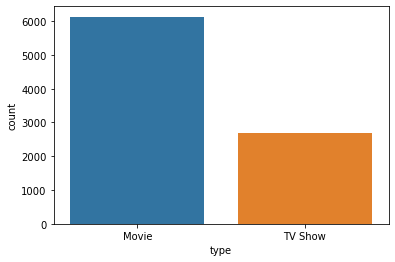

In [57]:
sns.countplot(data['type'])


#show all the movies that were added in 2000

In [61]:
#Q4.show all the movies that were added in 2000

In [79]:
data[(data['type']=='Movie')&(data['release_year']==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021.0,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021.0,2021.0
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,2021-09-22,2021.0,2021.0
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...,2021-09-22,2021.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,"January 8, 2021",2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...,2021-01-08,2021.0,2021.0
1431,s1432,Movie,Stuck Apart,NaN,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,"January 8, 2021",2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol...",2021-01-08,2021.0,2021.0
1436,s1437,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez","Juan Sebastián Gutiérrez, Pablo Cano, Pablo Me...",NaN,"January 6, 2021",2021,TV-MA,76 min,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin...",2021-01-06,2021.0,2021.0
1466,s1467,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...,2021-01-01,2021.0,2021.0


In [70]:
#Q5 show only the titles of 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,2021.0


In [76]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date_N          datetime64[ns]
year_release           float64
year_added             float64
dtype: object

In [80]:
#Q6 show top 10   director who gave   highest number of   show  to netflix?

In [84]:
data['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

In [91]:
grouped=data.groupby('director').count()
sorted_grouped=grouped.sort_values(by='title',ascending=False)
top_10=sorted_grouped.head(5)
print(top_10)

                        show_id  type  title  cast  country  date_added  \
director                                                                  
Rajiv Chilaka                19    19     19    17        3          19   
Raúl Campos, Jan Suter       18    18     18    18       18          18   
Suhas Kadav                  16    16     16    13        1          16   
Marcus Raboy                 16    16     16    16       15          16   
Jay Karas                    14    14     14    14       14          14   

                        release_year  rating  duration  listed_in  \
director                                                            
Rajiv Chilaka                     19      19        19         19   
Raúl Campos, Jan Suter            18      18        18         18   
Suhas Kadav                       16      16        16         16   
Marcus Raboy                      16      16        16         16   
Jay Karas                         14      14        14      

In [96]:
grouped=data.groupby('director').count()
sorted_grouped=grouped.sort_values(by='title',ascending=False)
top_5=sorted_grouped.head(5)
print(top_5)

                        show_id  type  title  cast  country  date_added  \
director                                                                  
Rajiv Chilaka                19    19     19    17        3          19   
Raúl Campos, Jan Suter       18    18     18    18       18          18   
Suhas Kadav                  16    16     16    13        1          16   
Marcus Raboy                 16    16     16    16       15          16   
Jay Karas                    14    14     14    14       14          14   

                        release_year  rating  duration  listed_in  \
director                                                            
Rajiv Chilaka                     19      19        19         19   
Raúl Campos, Jan Suter            18      18        18         18   
Suhas Kadav                       16      16        16         16   
Marcus Raboy                      16      16        16         16   
Jay Karas                         14      14        14      

In [107]:
#Q7 show all the records, where "category ==movie"   abd type='comedies' or  country=US

In [106]:
data[(data['type']=='Movie')&(data['listed_in']=='Documentaries')|(data['country']=='United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,2021.0
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,2021-09-16,2021.0,2021.0
117,s118,Movie,Final Account,Luke Holland,NaN,"United Kingdom, United States","September 2, 2021",2021,PG-13,94 min,Documentaries,This documentary stitches together never-befor...,2021-09-02,2021.0,2021.0
221,s222,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",Joshua Rofé,Bob Ross,NaN,"August 25, 2021",2021,TV-14,93 min,Documentaries,Bob Ross brought joy to millions as the world’...,2021-08-25,2021.0,2021.0
304,s305,Movie,Lady Boss: The Jackie Collins Story,Laura Fairrie,Jackie Collins,United Kingdom,"August 5, 2021",2021,TV-14,97 min,Documentaries,"""Queen of Sleaze"" or feminist pioneer? Powerho...",2021-08-05,2021.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,s8724,Movie,What Makes a Psychopath?,Rebecca Harrison,NaN,United Kingdom,"February 1, 2019",2017,TV-14,52 min,Documentaries,This wide-ranging documentary examines the beh...,2019-02-01,2019.0,2019.0
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...,2019-02-01,2019.0,2019.0
8738,s8739,Movie,Why Knot,Dhruv Dhawan,NaN,"Canada, India, Thailand, United States, United...","October 15, 2017",2016,TV-MA,84 min,Documentaries,"Pressured by his traditional family to marry, ...",2017-10-15,2017.0,2017.0
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,2017-03-31,2017.0,2017.0


In [ ]:
#Q8how many movies/show tom cruise is cast

In [127]:
data_new=data.dropna()
data_new[data_new.cast.str.contains('Tom Cruise')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01,2021.0,2021.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01,2021.0,2021.0


In [128]:
# Q9.what are type of ratings?

In [ ]:
data.rating.numique()

In [129]:
data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [130]:
# Q10.how many movies got the 'TV 14 ' rating in Canada?

In [134]:
data[(data.rating=='TV-14')&(data.country=='Canada')].count()


show_id         26
type            26
title           26
director        14
cast            20
country         26
date_added      26
release_year    26
rating          26
duration        26
listed_in       26
description     26
Date_N          26
year_release    26
year_added      26
dtype: int64

In [135]:
# Q11.how many TV show got the R rating, after 2018?

In [139]:
data[(data.rating=='R')&(data.type=='TV Show')&(data.year_added>2018)].shape

(1, 15)

In [140]:
#Q12. what is the maximum duration of movie/show in netflix for only the ones counted in minutes?

In [145]:
data.duration.dtypes

dtype('O')

In [146]:
data.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [159]:
data[['Minutes','Unite']]=data.duration.str.split(' ',expand=True)

In [173]:
data_new2=data.dropna()

In [174]:
data.sort_values(by='Minutes',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added,Minutes,Unite
1329,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,"Hedi Bouchenafa, Nassim Lyes, Fred Testot, Jul...",France,"February 10, 2021",2021,TV-MA,99 min,"Comedies, International Movies","In Paris, two dysfunctional dealers use family...",2021-02-10,2021.0,2021.0,99,min
6278,s6279,Movie,Being AP,Anthony Wonke,Tony McCoy,United Kingdom,"August 15, 2016",2015,TV-14,99 min,"Documentaries, International Movies, Sports Mo...","With retirement staring him in the face, an al...",2016-08-15,2016.0,2016.0,99,min
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021-05-01,2021.0,2021.0,99,min
6141,s6142,Movie,American Hangman,Wilson Coneybeare,"Donald Sutherland, Vincent Kartheiser, Oliver ...",Canada,"July 30, 2019",2019,TV-MA,99 min,Thrillers,A judge’s kidnapping is streamed live on socia...,2019-07-30,2019.0,2019.0,99,min
929,s930,Movie,Dead Again in Tombstone,Roel Reiné,"Danny Trejo, Jake Busey, Elysia Rotaru, Dean M...",NaN,"May 1, 2021",2017,R,99 min,"Action & Adventure, Horror Movies","At the devil's bidding, a deceased outlaw retu...",2021-05-01,2021.0,2021.0,99,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,s6557,TV Show,Dance Academy,NaN,"Xenia Goodwin, Alicia Banit, Dena Kaplan, Isab...",Australia,"December 20, 2017",2013,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fifteen-year-old Tara Webster's dream of danci...,2017-12-20,2017.0,2017.0,1,Season
2945,s2946,TV Show,Cagaster of an Insect Cage,NaN,"Yoshimasa Hosoya, Kana Hanazawa, Natsuki Hanae...",Japan,"February 6, 2020",2020,TV-MA,1 Season,"Anime Series, International TV Shows",Thirty years after a disease that turns the in...,2020-02-06,2020.0,2020.0,1,Season
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04,2017.0,2017.0,NaN,NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16,2016.0,2016.0,NaN,NaN


In [176]:
data_new2.Minutes.max()

'99'

In [177]:
#Q13.sort dataset by year

In [182]:
data.sort_values(by='release_year',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year_release,year_added,Minutes,Unite
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",2021-06-17,2021.0,2021.0,101,min
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,2021-06-02,2021.0,2021.0,99,min
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,2021-06-04,2021.0,2021.0,103,min
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,2021-06-04,2021.0,2021.0,1,Season
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",2021-06-04,2021.0,2021.0,94,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,2017-03-31,2017.0,2017.0,61,min
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017-03-31,2017.0,2017.0,45,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017-03-31,2017.0,2017.0,18,min
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,2017-03-31,2017.0,2017.0,52,min
